Проект по мэтчингу (поиску товаров, похожих по описанию

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import kmeans_plusplus

import phik
from phik.report import plot_correlation_matrix

In [51]:
base = pd.read_csv('base.csv')

In [5]:
train = pd.read_csv('train.csv')

In [6]:
validation = pd.read_csv('validation.csv')

In [7]:
validation_answer = pd.read_csv('validation_answer.csv')

In [3]:
def inform(x):
    print('Размер датасета:')
    print(x.shape)
    print('Инфо:')
    print(x.info())
    print('Первые строки:')
    print(x.head())
    print('Описание:')
    print(x.describe())
    print('Количество дубликатов')
    print(x.duplicated().sum())

Все данные закодированы, пропусков нет, собственно и предобработка не требуется. Подумал, что может перевести float64 в float32 для сокращения требуемого объема памяти, но тогда часть значений в цифрах не сохраняется, что недопустимо

In [15]:
base.head()

,Id,0,1,2,3,4,5,6,7,8,...,62,63,64,65,66,67,68,69,70,71
0,0-base,-115.083890,11.152912,-64.426760,-118.88089,216.482440,-104.698060,-469.070588,44.348083,120.915344,...,-42.808693,38.800827,-151.76218,-74.389090,63.66634,-4.703861,92.933610,115.269190,-112.756640,-60.830353
1,1-base,-34.562202,13.332763,-69.787610,-166.53348,57.680607,-86.098370,-85.076666,-35.637436,119.718636,...,-117.767525,41.100000,-157.82940,-94.446806,68.20211,24.346846,179.937930,116.834000,-84.888941,-59.524610
2,2-base,-54.233746,6.379371,-29.210136,-133.41383,150.895830,-99.435326,52.554795,62.381706,128.951450,...,-76.397800,46.011803,-207.14442,127.325570,65.56618,66.325680,81.073490,116.594154,-1074.464888,-32.527206
3,3-base,-87.520130,4.037884,-87.803030,-185.06763,76.369540,-58.985165,-383.182845,-33.611237,122.031910,...,-70.647940,-6.358921,-147.20105,-37.692750,66.20289,-20.566910,137.206940,117.474100,-1074.464888,-72.915490
4,4-base,-72.743850,6.522049,43.671265,-140.60803,5.820023,-112.074080,-397.711282,45.182500,122.167180,...,-57.199104,56.642403,-159.35184,85.944724,66.76632,-2.505783,65.315285,135.051590,-1074.464888,0.319401


In [10]:
train.head()

,Id,0,1,2,3,4,5,6,7,8,...,63,64,65,66,67,68,69,70,71,Target
0,0-query,-53.882748,17.971436,-42.117104,-183.93668,187.517490,-87.144930,-347.360606,38.307602,109.085560,...,70.107360,-155.80257,-101.965943,65.903790,34.457500,62.642094,134.763600,-415.750254,-25.958572,675816-base
1,1-query,-87.776370,6.806268,-32.054546,-177.26039,120.803330,-83.810590,-94.572749,-78.433090,124.915900,...,4.669178,-151.69771,-1.638704,68.170876,25.096191,89.974976,130.589630,-1035.092211,-51.276833,366656-base
2,2-query,-49.979565,3.841486,-116.118590,-180.40198,190.128430,-50.837620,26.943937,-30.447489,125.771164,...,78.039764,-169.14620,82.144186,66.008220,18.400496,212.409730,121.931470,-1074.464888,-22.547178,1447819-base
3,3-query,-47.810562,9.086598,-115.401695,-121.01136,94.652840,-109.255410,-775.150134,79.186520,124.003100,...,44.515266,-145.41675,93.990981,64.131350,106.061920,83.178760,118.277725,-1074.464888,-19.902788,1472602-base
4,4-query,-79.632126,14.442886,-58.903397,-147.05254,57.127068,-16.239529,-321.317964,45.984676,125.941284,...,45.028910,-196.09207,-117.626337,66.926220,42.456170,77.621765,92.479930,-1074.464888,-21.149351,717819-base


С таргетом не коррелируют признаки 12, 27, 28, 30, 37, 43. Кандидаты на выбывание

Как вариант сделать случайную выборку из base (10000) и train (1000)

In [36]:
base_1.head()

,Id,0,1,2,3,4,5,6,7,8,...,62,63,64,65,66,67,68,69,70,71
1584374,2112846-base,-92.666374,7.859496,-83.959260,-117.58036,10.475479,-96.271866,-30.593124,-59.858740,132.639200,...,-92.149090,56.957806,-111.19734,181.288994,66.81153,-34.340870,13.496716,80.658310,-1169.256720,10.724442
2528227,3889936-base,-70.863525,12.128458,26.693794,-110.35127,124.404160,-116.645050,16.140557,87.485820,125.945724,...,-109.331245,23.846937,-94.11282,100.060669,66.67702,72.847670,134.042110,138.271090,-1074.464888,-93.439316
308076,328806-base,-71.219940,2.760595,-32.654720,-175.25378,112.044730,-72.052400,-229.919140,25.132933,134.920580,...,-70.439150,26.628042,-154.21830,-91.795116,68.28721,4.009833,133.895230,138.980120,-1074.464888,-77.350860
1450793,1894119-base,-93.250060,12.136438,-32.811817,-134.85803,60.457474,-84.742195,-2.055919,-18.922186,127.080110,...,-80.112090,34.083107,-141.76967,-91.618048,69.82378,44.708115,63.644860,103.589060,-1074.464888,-56.363010
2388133,3599770-base,-85.798134,13.568428,-53.606680,-149.43290,138.078220,-72.410310,-786.467085,44.749210,125.561195,...,-24.284641,38.535736,-199.94563,-21.533007,68.20224,11.909060,112.319520,122.295074,-1074.464888,-46.379013


In [38]:
base_1 = base.sample(10000).drop('Id', axis=1)

NameError: name 'base' is not defined

In [56]:
predict = base.sample(100).drop('Id', axis=1)

In [62]:
kmeans = KMeans(init='k-means++', n_clusters=10, random_state=0, n_init="auto").fit(base_1)

In [67]:
labels = kmeans.labels_
base_1['cluster'] = labels

In [68]:
base_1.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,labels,cluster
1584374,-92.666374,7.859496,-83.959260,-117.58036,10.475479,-96.271866,-30.593124,-59.858740,132.639200,50.752525,...,-111.19734,181.288994,66.81153,-34.340870,13.496716,80.658310,-1169.256720,10.724442,8,8
2528227,-70.863525,12.128458,26.693794,-110.35127,124.404160,-116.645050,16.140557,87.485820,125.945724,102.859380,...,-94.11282,100.060669,66.67702,72.847670,134.042110,138.271090,-1074.464888,-93.439316,1,1
308076,-71.219940,2.760595,-32.654720,-175.25378,112.044730,-72.052400,-229.919140,25.132933,134.920580,240.214110,...,-154.21830,-91.795116,68.28721,4.009833,133.895230,138.980120,-1074.464888,-77.350860,8,8
1450793,-93.250060,12.136438,-32.811817,-134.85803,60.457474,-84.742195,-2.055919,-18.922186,127.080110,158.187240,...,-141.76967,-91.618048,69.82378,44.708115,63.644860,103.589060,-1074.464888,-56.363010,8,8
2388133,-85.798134,13.568428,-53.606680,-149.43290,138.078220,-72.410310,-786.467085,44.749210,125.561195,143.459880,...,-199.94563,-21.533007,68.20224,11.909060,112.319520,122.295074,-1074.464888,-46.379013,1,1


In [70]:
base_1.groupby('cluster').mean()

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,labels
cluster,,,,,,,,,,,,,,,,,,,,,
0,-90.674063,8.808222,-47.533246,-147.011190,109.318128,-71.001102,-344.411505,14.753645,123.578596,140.187902,...,35.302544,-152.009414,11.075697,67.688721,10.482684,55.843595,118.004674,-992.070837,-44.361631,0.0
1,-88.324227,7.947079,-47.294257,-145.151693,111.786021,-67.936647,-401.989264,12.887404,123.613794,127.904530,...,35.001221,-158.014882,10.943193,67.795404,27.262777,82.421977,115.594393,-1023.359447,-44.542724,1.0
2,-87.717867,8.463547,-41.940573,-147.319335,111.836123,-70.291988,-578.751172,24.172434,123.849610,126.528273,...,27.931725,-150.546035,16.875246,67.869136,18.104601,71.553953,116.375138,-299.829065,-50.477004,2.0
3,-85.730798,7.721808,-42.147468,-147.804937,111.551404,-75.589726,-129.527034,17.388893,123.856857,121.613944,...,36.449206,-156.317474,13.925954,67.700296,22.107933,76.668925,116.248626,-993.556541,-49.199805,3.0
4,-84.225250,8.286281,-41.916051,-146.619480,112.523052,-72.185355,-596.994679,19.759277,124.205381,120.394012,...,32.083495,-156.986130,19.640398,67.805495,26.312252,78.466887,115.044182,-1040.923236,-51.156597,4.0
5,-85.922468,7.706173,-45.478715,-146.285479,111.083265,-74.492962,-620.534333,19.495874,123.239235,126.319108,...,35.412008,-151.045661,12.640304,67.669265,23.301391,72.114975,116.116679,-1022.991617,-48.006331,5.0
6,-86.611496,7.811283,-45.189329,-146.083939,108.687204,-70.440791,-466.007246,22.239363,123.242505,124.663389,...,36.272454,-148.583052,20.896974,67.920583,24.801827,72.237432,114.507371,-267.118822,-45.851369,6.0
7,-87.942078,8.520712,-45.031256,-148.223125,107.536984,-70.189159,-93.883285,28.472048,124.258264,123.800824,...,24.913533,-152.023050,10.313279,67.856567,21.618167,83.307837,117.466342,-219.547554,-46.114390,7.0
8,-83.144014,8.512781,-43.138070,-147.847132,113.098715,-74.193779,-131.942700,20.074755,124.089205,120.814614,...,31.038170,-156.565059,5.219524,67.752983,29.435838,78.342867,114.993088,-1043.024474,-49.727862,8.0


In [83]:
base_1['cluster'].value_counts()

cluster
4    1630
8    1552
1    1311
5     992
3     867
2     779
6     759
7     725
9     714
0     671
Name: count, dtype: int64

In [89]:
centers = kmeans.cluster_centers_

In [96]:
len(centers)

10

In [98]:
centers_dict = {}

In [99]:
for center in range(len(centers)):
    centers_dict[center]= centers[center]

In [138]:
centers_dict

{0: array([ -90.67406262,    8.80822238,  -47.53324569, -147.01118974,
         109.31812834,  -71.00110179, -344.41150483,   14.75364496,
         123.57859583,  140.18790213, -144.76145461,  -70.96610825,
         -38.45730695,    4.76095589,  155.17298267,  -23.09236639,
          -2.20104226,  -16.12702512, -142.75736469,  -79.09397281,
         -98.12193466, 1421.16096911,  -23.07873332,   58.11398324,
          22.43488538,  217.8580569 ,  -69.99871325,   16.4760017 ,
        -103.2102856 ,  151.45999821,  -12.87276346, -144.38534855,
          92.00622682, -563.38425194,   34.38297483,   78.54723434,
         -13.85563956, -145.12401859, -118.1079733 ,  -42.35284457,
         -10.39903789,    4.68452479, -106.36939399,  123.28964644,
         -40.89519398,   53.53185179, -101.21628759, -136.45060834,
          52.47808931,  -33.20655923,   22.36416408,  -16.544645  ,
          65.32345984, -123.05393901,   88.33164888,   70.10224348,
        -133.82070937,   14.46760501, -116.47

In [195]:
len([centers[0]])

1

In [189]:
base_1

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,cluster
1584374,-92.666374,7.859496,-83.959260,-117.58036,10.475479,-96.271866,-30.593124,-59.858740,132.639200,50.752525,...,56.957806,-111.197340,181.288994,66.811530,-34.340870,13.496716,80.658310,-1169.256720,10.724442,8
2528227,-70.863525,12.128458,26.693794,-110.35127,124.404160,-116.645050,16.140557,87.485820,125.945724,102.859380,...,23.846937,-94.112820,100.060669,66.677020,72.847670,134.042110,138.271090,-1074.464888,-93.439316,1
308076,-71.219940,2.760595,-32.654720,-175.25378,112.044730,-72.052400,-229.919140,25.132933,134.920580,240.214110,...,26.628042,-154.218300,-91.795116,68.287210,4.009833,133.895230,138.980120,-1074.464888,-77.350860,8
1450793,-93.250060,12.136438,-32.811817,-134.85803,60.457474,-84.742195,-2.055919,-18.922186,127.080110,158.187240,...,34.083107,-141.769670,-91.618048,69.823780,44.708115,63.644860,103.589060,-1074.464888,-56.363010,8
2388133,-85.798134,13.568428,-53.606680,-149.43290,138.078220,-72.410310,-786.467085,44.749210,125.561195,143.459880,...,38.535736,-199.945630,-21.533007,68.202240,11.909060,112.319520,122.295074,-1074.464888,-46.379013,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308298,-85.283850,20.332785,-49.180435,-133.11478,13.359192,-49.336540,-583.374618,20.609064,123.546430,138.027560,...,-14.600540,-127.344986,-32.328193,66.490746,111.787476,-50.127174,108.864510,66.675810,20.954098,6
313650,-88.076890,12.491481,-99.427150,-162.43642,113.975700,-36.087578,-47.398775,45.883823,116.437210,219.935610,...,11.102753,-164.560260,114.145381,66.017720,-39.571630,94.563736,85.286530,-1074.464888,-63.714394,8
1562277,-52.122437,11.117685,-61.518036,-158.55630,138.729830,-60.251236,-442.804078,34.215540,129.976530,110.731290,...,54.824455,-154.783780,-131.246823,69.601845,113.637314,39.898560,132.643220,-1297.581506,-75.101020,0
390997,-95.596306,16.766329,-48.217083,-150.16125,89.994210,-61.759457,-444.341784,66.778640,129.732770,103.533615,...,-46.341995,-164.341810,-149.652462,68.704620,34.909565,96.493370,110.701280,-559.647524,-68.882774,2


In [207]:
base_1.loc[(base_1['cluster'] == 0), 'center']

2622455   NaN
1683050   NaN
2149470   NaN
1640236   NaN
2616421   NaN
           ..
2382440   NaN
2659202   NaN
459440    NaN
2467759   NaN
1562277   NaN
Name: center, Length: 671, dtype: float64

In [204]:
base_1['center'].astype('object')

1584374    NaN
2528227    NaN
308076     NaN
1450793    NaN
2388133    NaN
          ... 
308298     NaN
313650     NaN
1562277    NaN
390997     NaN
43912      NaN
Name: center, Length: 10000, dtype: object

In [148]:
base.head()

,Id,0,1,2,3,4,5,6,7,8,...,62,63,64,65,66,67,68,69,70,71
0,0-base,-115.083890,11.152912,-64.426760,-118.88089,216.482440,-104.698060,-469.070588,44.348083,120.915344,...,-42.808693,38.800827,-151.76218,-74.389090,63.66634,-4.703861,92.933610,115.269190,-112.756640,-60.830353
1,1-base,-34.562202,13.332763,-69.787610,-166.53348,57.680607,-86.098370,-85.076666,-35.637436,119.718636,...,-117.767525,41.100000,-157.82940,-94.446806,68.20211,24.346846,179.937930,116.834000,-84.888941,-59.524610
2,2-base,-54.233746,6.379371,-29.210136,-133.41383,150.895830,-99.435326,52.554795,62.381706,128.951450,...,-76.397800,46.011803,-207.14442,127.325570,65.56618,66.325680,81.073490,116.594154,-1074.464888,-32.527206
3,3-base,-87.520130,4.037884,-87.803030,-185.06763,76.369540,-58.985165,-383.182845,-33.611237,122.031910,...,-70.647940,-6.358921,-147.20105,-37.692750,66.20289,-20.566910,137.206940,117.474100,-1074.464888,-72.915490
4,4-base,-72.743850,6.522049,43.671265,-140.60803,5.820023,-112.074080,-397.711282,45.182500,122.167180,...,-57.199104,56.642403,-159.35184,85.944724,66.76632,-2.505783,65.315285,135.051590,-1074.464888,0.319401


In [61]:
neigh = NearestNeighbors(n_neighbors=5, radius=0.4)
neigh.fit(base_1)
NearestNeighbors()
neigh.kneighbors(centers, 2, return_distance=False)


/Users/vladimirmartynets/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


array([[ 269, 5771],
       [9451, 4635],
       [3415, 5261],
       [4560, 5716],
       [4136, 6127],
       [3017, 3842],
       [3798,  318],
       [6878,  171],
       [7347, 4421],
       [9438, 8203]])

In [225]:
base_1 = base_1.drop(['center'], axis=1)

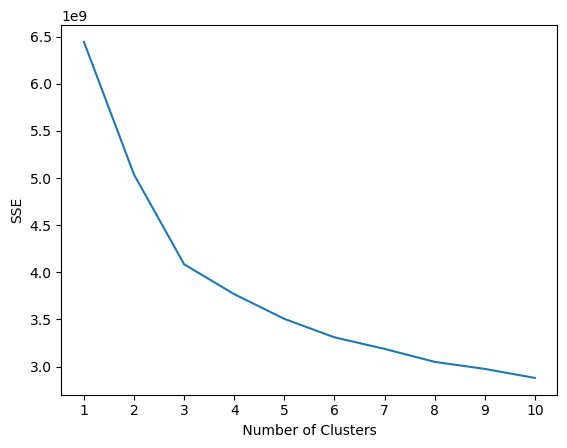

CPU times: user 18.3 s, sys: 2.52 s, total: 20.8 s
Wall time: 3.29 s


In [227]:
%%time

# Метод локтя

kmeans_kwargs = {
"init": "k-means++",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(base_1)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel(" Number of Clusters ")
plt.ylabel("SSE")
plt.show() 

NameError: name 'nnn' is not defined